# Overview
The below code loops through all of the socioeconomic datasets from 2010-2016

Current data transformations:
* Removed the first row of each file, the first is a repeat of the column headers (also may replace column headers if we want).
* Removed Country and State Level data, which are indicated by their 5-digit FIPS code being % 1000 == 0

Still Need To:
* Decide exactly which columns we want to use
* Make sure for these columns that we parse them as the correct dtype

In [44]:
import pandas as pd
import numpy as np
import missingno as msno
import os

## Loading Socioeconomic Data

In [45]:
all_socio_df = []


for i in range(0,7):
    '''
    If we want to get specific columns of the dataframe, we can use the usecols list. Note that we cannot specify
    the dtype here as the second row of the dataframe (which has string values) interferes with it. We could solve
    this by removing the second row of the csv or specifying dtypes later:
    
    current_df = pd.read_csv('../data/county_level/countyhealthranking/analytic_data201' + str(i) + '.csv',
                             usecols = ['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'Name'])    
    
    '''
    current_df = pd.read_csv('../../data/county_level/countyhealthranking/analytic_data201' + str(i) + '.csv')
    
    
    '''
    I am not sure which row we want to use for the headings of the dataframe. The two options right now are
    the first and second rows of the csvs. The current code uses the first row as the names. If we want to use
    the second row instead, comment out the line below this comment and replace it with:
    
    # The below code essentially makes the second row in the csv the header for the dataframe
    new_header = current_df.iloc[0] #grab the first row for the header
    current_df = current_df[1:] #take the data less the header row
    current_df.columns = new_header #set the header row as the df header    
    '''
    current_df = current_df.drop(0)
    
    '''
    We also want to filter out the data that belongs to the US and each individual state. We can do this by looking
    at the 5-digit FIPS code (fipscode), where if fipscode % 1000 == 0, then the row belongs to a state. We also 
    want this row to be of type int32. We will have to deal with typing later for other columns as well.
    
    We will need to change the hardcoded '5-digit FIPS Code' and 'Release Year' if we change the column headers
    '''
    current_df['5-digit FIPS Code'] = current_df['5-digit FIPS Code'].astype(str)
    current_df['Release Year'] = current_df['Release Year'].astype(str).astype(int)
    current_df = current_df[current_df['5-digit FIPS Code'].astype(int) % 1000 != 0]
    
    all_socio_df.append(current_df)
    
# ignore_index = True just reindexes the rows for the new dataframe
socio_df = pd.concat(all_socio_df, ignore_index=True)

C:\Users\mikey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

C:\Users\mikey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

## Loading Mental Health Data

In [46]:
float_columns = ['Crude Rate', 'Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval',
                 'Crude Rate Standard Error', 'Age Adjusted Rate', 'Age Adjusted Rate Lower 95% Confidence Interval',
                 'Age Adjusted Rate Upper 95% Confidence Interval', 'Age Adjusted Rate Standard Error']

int_columns = ['Year', 'Deaths', 'Population']

string_columns = ['County Code']

all_columns = string_columns.copy()

all_columns.extend(string_columns)
all_columns.extend(int_columns)
all_columns.extend(float_columns)

mental_health_df = pd.read_csv('../../data/county_level/wonder_cdc/Suicides Yearly, 2010-2016.txt', sep='\t',
                               usecols = all_columns)

print(mental_health_df.columns)

# There is text at the bottom of the file that we do not want to include
mental_health_df = mental_health_df[mental_health_df['County Code'].notnull()]

# Drop rows with missing Deaths data
mental_health_df = mental_health_df[mental_health_df['Deaths'] != "Missing"]

# The numbers are parsed as floats but we want them to be ints
for column_name in mental_health_df.columns:
    if column_name in string_columns:
        mental_health_df[column_name] = mental_health_df[column_name].astype(int).astype(str)
    elif column_name in float_columns:
        mental_health_df[column_name] = mental_health_df[column_name].str.replace("\(Unreliable\)","").astype(float)
    else:
        mental_health_df[column_name] = mental_health_df[column_name].astype(int)
        
        
def make_5_digits(num):
    if len(num) == 4:
        num = "0" + num
    return num

mental_health_df["County Code"] = mental_health_df["County Code"].apply(make_5_digits)
    
mental_health_df

Index(['County Code', 'Year', 'Deaths', 'Population', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error',
       'Age Adjusted Rate', 'Age Adjusted Rate Lower 95% Confidence Interval',
       'Age Adjusted Rate Upper 95% Confidence Interval',
       'Age Adjusted Rate Standard Error'],
      dtype='object')


,County Code,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval,Age Adjusted Rate Standard Error
0,01001,2010,12,54571,22.0,11.4,38.4,6.3,21.1,10.9,36.8,6.1
1,01001,2011,12,55255,21.7,11.2,37.9,6.3,20.4,10.6,35.7,5.9
2,01001,2012,12,55027,21.8,11.3,38.1,6.3,21.1,10.9,36.8,6.1
3,01001,2013,11,54792,20.1,10.0,35.9,6.1,19.4,9.7,34.7,5.9
4,01001,2016,14,55416,25.3,13.8,42.4,6.8,23.0,12.6,38.7,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...
6361,56037,2010,11,43806,25.1,12.5,44.9,7.6,25.5,12.2,46.9,8.0
6362,56037,2011,15,44028,34.1,19.1,56.2,8.8,37.4,20.4,62.7,10.1
6363,56037,2012,13,45086,28.8,15.4,49.3,8.0,28.3,14.6,49.4,8.2
6364,56037,2013,13,45144,28.8,15.3,49.2,8.0,29.7,15.8,50.7,8.3


## Loading Environmental Data

In [47]:
fips_data_path = "../../data/county_level/county_fips.csv"
fips_df = pd.read_csv(fips_data_path)

fips_df["FIPS"] = fips_df["FIPS"].apply(str)

def get_last_three(num):
    return num[-3:]

fips_df["County FIPS"] = fips_df["FIPS"].apply(get_last_three)
fips_df["FIPS"] = fips_df["FIPS"].apply(make_5_digits)

# All of the original 50 U.S. states have FIPS codes less than 57000
fips_df = fips_df[fips_df["FIPS"].astype(int) < 57000]
fips_df

,FIPS,Name,State,County FIPS
0,01001,Autauga,AL,001
1,01003,Baldwin,AL,003
2,01005,Barbour,AL,005
3,01007,Bibb,AL,007
4,01009,Blount,AL,009
...,...,...,...,...
3137,56037,Sweetwater,WY,037
3138,56039,Teton,WY,039
3139,56041,Uinta,WY,041
3140,56043,Washakie,WY,043


### Temparature

There are 15 Counties with no temperature data

In [48]:
base_temp_path = "../../data/county_level/county_climate_temp/"

months = ["January Average Temperature", "February Average Temperature", "March Average Temperature",
          "April Average Temperature", "May Average Temperature", "June Average Temperature",
          "July Average Temperature", "August Average Temperature", "September Average Temperature",
          "October Average Temperature", "November Average Temperautre", "December Average Temperature"]

all_columns = ["County Code", "Year", "Average Temperature"]
all_columns.extend(months)

temp_df = pd.DataFrame(columns = all_columns)

no_temp_data_count = 0

for index, county_info_row in fips_df.iterrows():
    curr_file_path = base_temp_path + county_info_row["State"] + "-" + county_info_row["County FIPS"] + "-tavg-all-12-2010-2016.csv"
    
    file_size = os.path.getsize(curr_file_path)
    
    if file_size > 0:
        curr_data_df = pd.read_csv(curr_file_path, skiprows=(3))
        
        if curr_data_df.shape[0] == 84:
            curr_sum = 0
            month_count = 0
            curr_df_row = {'County Code': county_info_row["FIPS"]}

            for inner_index, temparature_row in curr_data_df.iterrows():
                curr_year = int(temparature_row['Date'].astype(str)[:4])
                curr_month_temp = temparature_row['Value'].astype(float)
                
                curr_df_row['Year'] = curr_year
                curr_df_row[months[month_count]] = curr_month_temp

                curr_sum += curr_month_temp
                month_count += 1

                if (month_count == 12):
                    curr_df_row['Average Temperature'] = curr_sum/12
                    
                    temp_df = temp_df.append(curr_df_row, ignore_index=True)

                    month_count = 0
                    curr_sum = 0
        else:
            no_temp_data_count += 1
    else:
        no_temp_data_count += 1
    
print("There are " + str(no_temp_data_count) + " counties that have no Temperature data")
temp_df

There are 15 counties that have no Temperature data


,County Code,Year,Average Temperature,January Average Temperature,February Average Temperature,March Average Temperature,April Average Temperature,May Average Temperature,June Average Temperature,July Average Temperature,August Average Temperature,September Average Temperature,October Average Temperature,November Average Temperautre,December Average Temperature
0,01001,2010,63.591667,41.5,41.6,51.9,64.7,74.7,81.9,83.4,83.7,78.4,65.1,55.5,40.7
1,01001,2011,64.658333,41.5,50.3,58.6,66.5,70.3,82.1,82.5,83.3,73.6,61.6,55.8,49.8
2,01001,2012,65.658333,50.5,53.4,65.2,66.3,74.3,77.3,82.1,78.9,73.8,63.2,51.7,51.2
3,01001,2013,63.491667,51.1,48.6,50.3,63.4,69.4,79.1,78.3,78.6,75.6,65.7,52.7,49.1
4,01001,2014,62.950000,37.6,48.7,53.5,63.4,70.5,78.8,79.5,80.6,77.3,66.1,48.2,51.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,56045,2012,48.350000,25.0,25.1,45.0,48.6,54.3,69.3,77.0,71.2,61.2,43.4,36.2,23.9
21885,56045,2013,44.241667,21.8,25.8,33.2,36.3,54.0,63.7,71.6,70.8,62.7,41.0,32.5,17.5
21886,56045,2014,44.000000,23.6,17.5,32.6,42.3,52.8,60.3,70.0,68.7,58.9,49.1,26.5,25.7
21887,56045,2015,46.633333,24.4,27.3,40.1,44.6,48.7,65.8,69.0,69.3,64.1,49.8,32.0,24.5


### Precipitation

In [49]:
base_precip_path = "../../data/county_level/county_climate_precip/"

months = ["January Average Precipitation", "February Average Precipitation", "March Average Precipitation",
          "April Average Precipitation", "May Average Precipitation", "June Average Precipitation",
          "July Average Precipitation", "August Average Precipitation", "September Average Precipitation",
          "October Average Precipitation", "November Average Precipitation", "December Average Precipitation"]

all_columns = ["County Code", "Year", "Average Precipitation"]
all_columns.extend(months)

precip_df = pd.DataFrame(columns = all_columns)

no_precip_data_count = 0

for index, county_info_row in fips_df.iterrows():
    curr_file_path = base_precip_path + county_info_row["State"] + "-" + county_info_row["County FIPS"] + "-pcp-all-12-2010-2016.csv"
    
    file_size = os.path.getsize(curr_file_path)
    
    if file_size > 0:
        curr_data_df = pd.read_csv(curr_file_path, skiprows=(3))
        
        if curr_data_df.shape[0] == 84:
            curr_sum = 0
            month_count = 0
            curr_df_row = {'County Code': county_info_row["FIPS"]}

            for inner_index, precipitation_row in curr_data_df.iterrows():
                curr_year = int(precipitation_row['Date'].astype(str)[:4])
                curr_month_precip = precipitation_row['Value'].astype(float)
                
                curr_df_row['Year'] = curr_year
                curr_df_row[months[month_count]] = curr_month_precip

                curr_sum += curr_month_precip
                month_count += 1

                if (month_count == 12):
                    curr_df_row['Average Precipitation'] = curr_sum/12
                    
                    precip_df = precip_df.append(curr_df_row, ignore_index=True)

                    month_count = 0
                    curr_sum = 0
        else:
            no_precip_data_count += 1
    else:
        no_precip_data_count += 1
    
print("There are " + str(no_precip_data_count) + " counties that have no Precipitation data")
precip_df

There are 15 counties that have no Precipitation data


,County Code,Year,Average Precipitation,January Average Precipitation,February Average Precipitation,March Average Precipitation,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation
0,01001,2010,3.825000,6.51,4.59,5.26,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89
1,01001,2011,3.769167,2.66,4.45,8.45,4.19,1.93,3.39,4.38,1.75,4.46,0.98,4.63,3.96
2,01001,2012,4.503333,5.26,4.90,6.72,1.93,5.22,2.43,5.00,5.50,6.35,1.78,1.04,7.91
3,01001,2013,5.194167,5.81,11.16,3.94,5.97,2.42,3.97,8.24,4.15,2.41,2.00,2.71,9.55
4,01001,2014,4.121667,2.63,4.55,6.64,8.53,4.05,4.15,3.30,2.60,2.90,3.31,1.60,5.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21884,56045,2012,0.759167,0.34,1.04,0.14,1.01,1.71,1.27,1.67,0.19,0.09,0.98,0.45,0.22
21885,56045,2013,1.618333,0.49,0.30,0.44,2.08,3.73,2.01,2.99,2.38,1.24,2.96,0.26,0.54
21886,56045,2014,1.220833,0.40,0.36,0.89,1.58,1.79,3.15,0.98,1.49,2.30,0.47,0.77,0.47
21887,56045,2015,1.531667,0.28,0.35,0.26,1.81,4.93,4.85,2.28,1.72,0.29,1.04,0.33,0.24


## Merging datasets

Dataframe was 6324 x 709 before adding temperature and precipitation data

It is now 6280 x 743 after adding it

In [50]:
# This is by default an inner join, which makes sense since we only want to match when year and county code are the same
full_df = pd.merge(socio_df, mental_health_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])
full_df = full_df.drop(columns=['County Code', 'Year'])

full_df = pd.merge(full_df, temp_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])
full_df = full_df.drop(columns=['County Code', 'Year'])

full_df = pd.merge(full_df, precip_df,
                   left_on=['5-digit FIPS Code', 'Release Year'],
                   right_on=['County Code', 'Year'])
full_df = full_df.drop(columns=['County Code', 'Year'])

# As we can see, we can now see the deaths column in our full dataframe
full_df

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,March Average Precipitation,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation
0,01,001,01001,AL,Autauga County,2010,1,9778.1,670,137881,...,5.26,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89
1,01,003,01003,AL,Baldwin County,2010,1,8221.7,2148,449589,...,4.77,2.31,6.31,4.94,4.08,9.38,2.24,2.06,6.11,2.19
2,01,009,01009,AL,Blount County,2010,1,8929.7,787,155580,...,6.76,5.66,7.47,3.39,3.55,4.31,1.23,3.12,4.62,2.07
3,01,015,01015,AL,Calhoun County,2010,1,11526.2,2035,313874,...,6.10,3.73,6.46,2.70,4.00,3.78,1.55,2.96,3.06,2.24
4,01,031,01031,AL,Coffee County,2010,1,9004.7,645,126516,...,3.46,1.88,4.71,3.84,2.78,6.30,2.41,1.38,3.71,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,56,1,56001,WY,Albany County,2016,1,5297.8,258,107325,...,2.01,2.93,2.46,0.89,0.39,0.63,0.80,0.32,0.91,1.18
6276,56,13,56013,WY,Fremont County,2016,1,13137.7,679,114673,...,2.54,2.96,3.32,0.49,0.25,0.77,2.27,1.92,0.85,2.04
6277,56,21,56021,WY,Laramie County,2016,1,7002.7,1029,266542,...,2.54,3.61,2.42,1.16,1.02,1.51,0.82,0.30,0.54,0.72
6278,56,25,56025,WY,Natrona County,2016,1,8170.3,957,222066,...,1.46,2.72,2.25,0.64,0.49,0.87,1.61,0.53,0.57,0.87


## Analyzing Data
Right now I am only showing the null values in the data using the missingno library, we can utilize other things from this library from here: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

Note that since we currently have so many columns, this is not very helpful, but once we narrow down the columns then this should give us insights

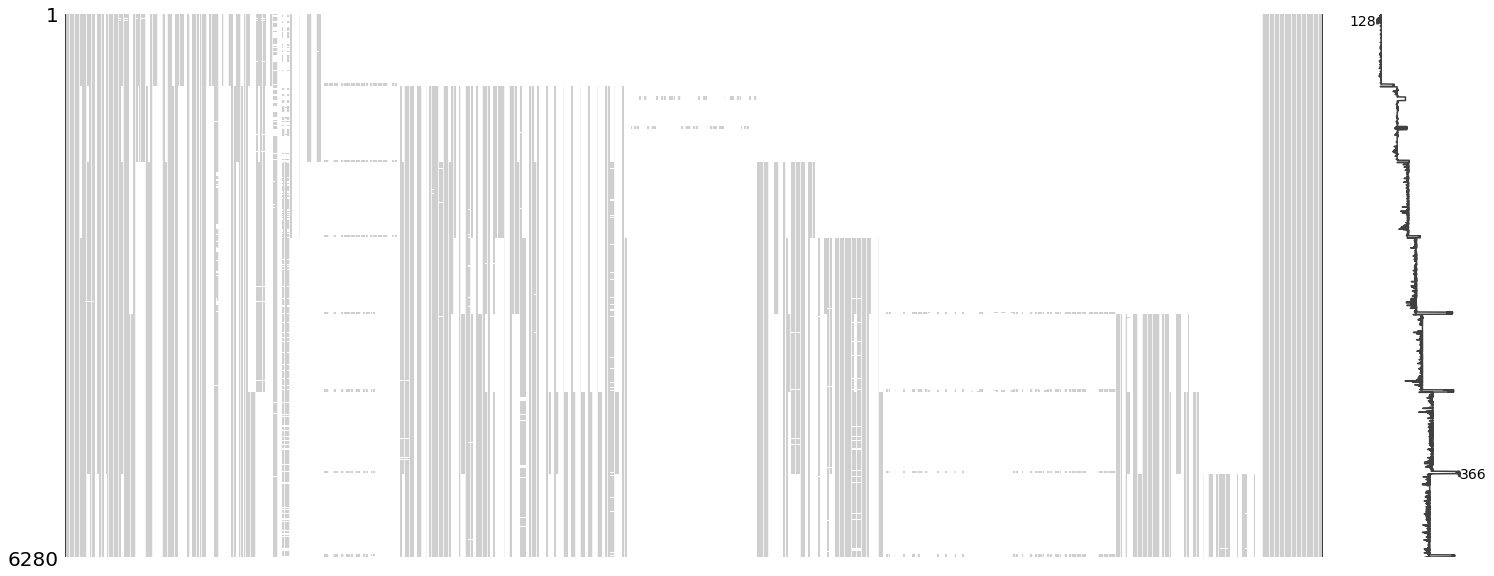

In [51]:
msno.matrix(full_df)

## Saving the Data
Saving data to csv`

In [52]:
# write to csv
full_df.to_csv("../../data/processed_data/full_df.csv")

'''
We can read back in the dataframe from this pickle using the following command:
output = pd.read_csv("../data/county_level/full_df.csv")

'''


'\nWe can read back in the dataframe from this pickle using the following command:\noutput = pd.read_csv("../data/county_level/full_df.csv")\n\n'

In [53]:
df = pd.read_csv("../../data/processed_data/full_df.csv")
df

,Unnamed: 0,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,...,March Average Precipitation,April Average Precipitation,May Average Precipitation,June Average Precipitation,July Average Precipitation,August Average Precipitation,September Average Precipitation,October Average Precipitation,November Average Precipitation,December Average Precipitation
0,0,1,1,1001,AL,Autauga County,2010,1.0,9778.1,670.0,...,5.26,2.17,5.72,2.47,3.38,4.38,1.38,3.14,5.01,1.89
1,1,1,3,1003,AL,Baldwin County,2010,1.0,8221.7,2148.0,...,4.77,2.31,6.31,4.94,4.08,9.38,2.24,2.06,6.11,2.19
2,2,1,9,1009,AL,Blount County,2010,1.0,8929.7,787.0,...,6.76,5.66,7.47,3.39,3.55,4.31,1.23,3.12,4.62,2.07
3,3,1,15,1015,AL,Calhoun County,2010,1.0,11526.2,2035.0,...,6.10,3.73,6.46,2.70,4.00,3.78,1.55,2.96,3.06,2.24
4,4,1,31,1031,AL,Coffee County,2010,1.0,9004.7,645.0,...,3.46,1.88,4.71,3.84,2.78,6.30,2.41,1.38,3.71,2.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6275,6275,56,1,56001,WY,Albany County,2016,1.0,5297.8,258.0,...,2.01,2.93,2.46,0.89,0.39,0.63,0.80,0.32,0.91,1.18
6276,6276,56,13,56013,WY,Fremont County,2016,1.0,13137.7,679.0,...,2.54,2.96,3.32,0.49,0.25,0.77,2.27,1.92,0.85,2.04
6277,6277,56,21,56021,WY,Laramie County,2016,1.0,7002.7,1029.0,...,2.54,3.61,2.42,1.16,1.02,1.51,0.82,0.30,0.54,0.72
6278,6278,56,25,56025,WY,Natrona County,2016,1.0,8170.3,957.0,...,1.46,2.72,2.25,0.64,0.49,0.87,1.61,0.53,0.57,0.87


In [54]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 744 columns):
 #   Column                                                               Dtype  
---  ------                                                               -----  
 0   Unnamed: 0                                                           int64  
 1   State FIPS Code                                                      int64  
 2   County FIPS Code                                                     int64  
 3   5-digit FIPS Code                                                    int64  
 4   State Abbreviation                                                   object 
 5   Name                                                                 object 
 6   Release Year                                                         int64  
 7   County Ranked (Yes=1/No=0)                                           float64
 8   Premature death raw value                                          

In [55]:
df = df.infer_objects() # infer datatypes for each column if possible
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 744 columns):
 #   Column                                                               Dtype  
---  ------                                                               -----  
 0   Unnamed: 0                                                           int64  
 1   State FIPS Code                                                      int64  
 2   County FIPS Code                                                     int64  
 3   5-digit FIPS Code                                                    int64  
 4   State Abbreviation                                                   object 
 5   Name                                                                 object 
 6   Release Year                                                         int64  
 7   County Ranked (Yes=1/No=0)                                           float64
 8   Premature death raw value                                          

In [56]:
df = df.dropna(axis=1, how='all') # drop all columns that are entirely missing
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 543 columns):
 #   Column                                                               Dtype  
---  ------                                                               -----  
 0   Unnamed: 0                                                           int64  
 1   State FIPS Code                                                      int64  
 2   County FIPS Code                                                     int64  
 3   5-digit FIPS Code                                                    int64  
 4   State Abbreviation                                                   object 
 5   Name                                                                 object 
 6   Release Year                                                         int64  
 7   County Ranked (Yes=1/No=0)                                           float64
 8   Premature death raw value                                          

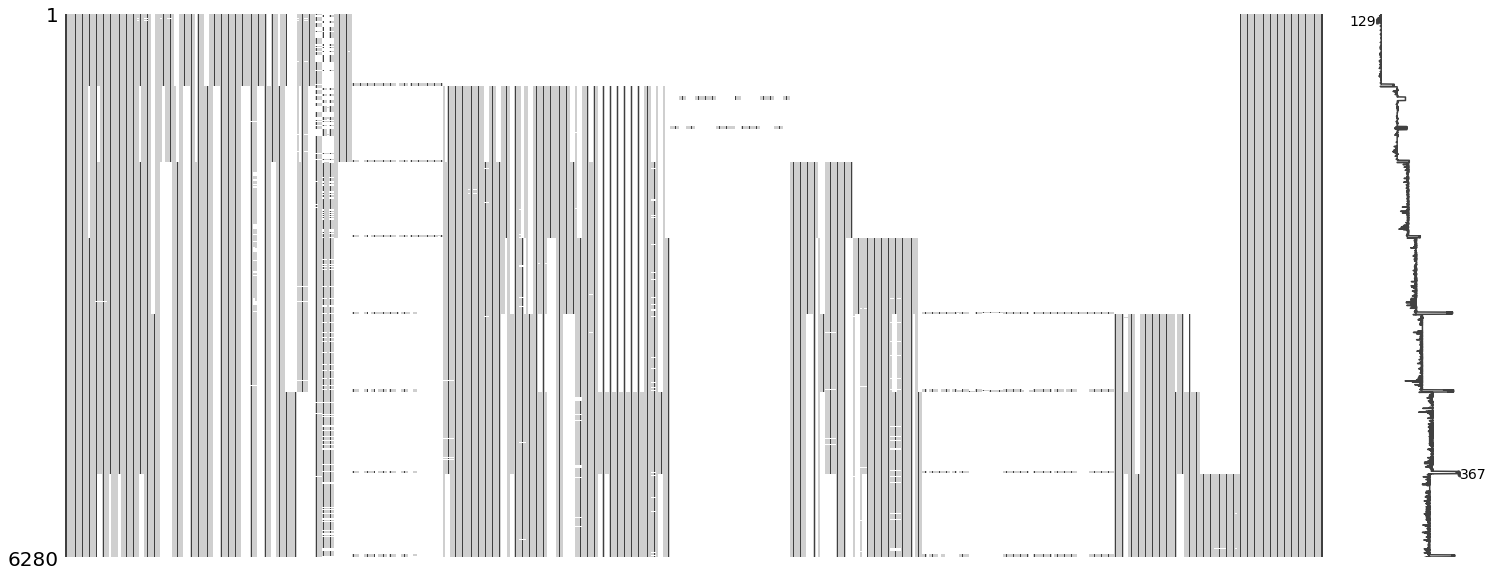

In [57]:
msno.matrix(df)

In [58]:
df.to_csv("../../data/processed_data/full_df.csv") # save df again